# LIVER CANCER PREDICTION 

# Import Libraries 

In [297]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, auc
)
from sklearn.preprocessing import label_binarize

# Load Data 

In [298]:
df = pd.read_csv("/kaggle/input/predict-liver-cancer-from-and-clinical-features/synthetic_liver_cancer_dataset.csv")
df.head()

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,Female,18.1,Regular,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,Female,19.9,Occasional,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,Female,25.5,Never,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,Male,16.0,Never,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,Male,21.0,Occasional,Former,0,0,39.5,4.95,1,0,Low,1,1


# Data Analysis 

In [299]:
df.shape

(5000, 14)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5000 non-null   int64  
 1   gender                   5000 non-null   object 
 2   bmi                      5000 non-null   float64
 3   alcohol_consumption      5000 non-null   object 
 4   smoking_status           5000 non-null   object 
 5   hepatitis_b              5000 non-null   int64  
 6   hepatitis_c              5000 non-null   int64  
 7   liver_function_score     5000 non-null   float64
 8   alpha_fetoprotein_level  5000 non-null   float64
 9   cirrhosis_history        5000 non-null   int64  
 10  family_history_cancer    5000 non-null   int64  
 11  physical_activity_level  5000 non-null   object 
 12  diabetes                 5000 non-null   int64  
 13  liver_cancer             5000 non-null   int64  
dtypes: float64(3), int64(7),

In [301]:
df.describe()

,age,bmi,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,diabetes,liver_cancer
count,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.222800,25.90464,0.15120,0.095800,65.203900,15.109424,0.301600,0.241400,0.199200,0.217800
std,15.799224,5.10520,0.35828,0.294346,14.875477,15.196809,0.458998,0.427975,0.399439,0.412792
min,30.000000,8.10000,0.00000,0.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,22.50000,0.00000,0.000000,54.800000,4.357500,0.000000,0.000000,0.000000,0.000000
50%,57.000000,25.90000,0.00000,0.000000,65.200000,10.340000,0.000000,0.000000,0.000000,0.000000
75%,71.000000,29.30000,0.00000,0.000000,75.200000,21.010000,1.000000,0.000000,0.000000,0.000000
max,84.000000,43.70000,1.00000,1.000000,115.700000,136.800000,1.000000,1.000000,1.000000,1.000000


In [302]:
df.isnull().sum()

age                        0
gender                     0
bmi                        0
alcohol_consumption        0
smoking_status             0
hepatitis_b                0
hepatitis_c                0
liver_function_score       0
alpha_fetoprotein_level    0
cirrhosis_history          0
family_history_cancer      0
physical_activity_level    0
diabetes                   0
liver_cancer               0
dtype: int64

In [303]:
df.duplicated().sum()

0

In [304]:
df.head()

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,Female,18.1,Regular,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,Female,19.9,Occasional,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,Female,25.5,Never,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,Male,16.0,Never,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,Male,21.0,Occasional,Former,0,0,39.5,4.95,1,0,Low,1,1


In [305]:
df['liver_cancer'].value_counts()

liver_cancer
0    3911
1    1089
Name: count, dtype: int64

# Data Preprocessing ans Splitting 

In [306]:
enc = OrdinalEncoder()

In [307]:
df['gender'] = enc.fit_transform(df['gender'].values.reshape(-1,1))

In [308]:
df.head()

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,0.0,18.1,Regular,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,0.0,19.9,Occasional,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,0.0,25.5,Never,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,1.0,16.0,Never,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,1.0,21.0,Occasional,Former,0,0,39.5,4.95,1,0,Low,1,1


In [309]:
df['alcohol_consumption'].value_counts()

alcohol_consumption
Never         2014
Occasional    1967
Regular       1019
Name: count, dtype: int64

In [310]:
df['alcohol_consumption'] = enc.fit_transform(df['alcohol_consumption'].values.reshape(-1,1))

In [311]:
df.head()

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,0.0,18.1,2.0,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,0.0,19.9,1.0,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,0.0,25.5,0.0,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,1.0,16.0,0.0,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,1.0,21.0,1.0,Former,0,0,39.5,4.95,1,0,Low,1,1


In [312]:
df['smoking_status'].value_counts()

smoking_status
Never      2407
Former     1568
Current    1025
Name: count, dtype: int64

In [313]:
df['smoking_status'] = enc.fit_transform(df['smoking_status'].values.reshape(-1,1))

In [314]:
df.head()

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,0.0,18.1,2.0,1.0,0,0,51.9,16.44,0,0,Low,0,0
1,81,0.0,19.9,1.0,2.0,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,0.0,25.5,0.0,2.0,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,1.0,16.0,0.0,1.0,0,0,50.3,19.09,0,0,Low,1,0
4,72,1.0,21.0,1.0,1.0,0,0,39.5,4.95,1,0,Low,1,1


In [315]:
df['physical_activity_level'].value_counts()

physical_activity_level
Moderate    2027
Low         1957
High        1016
Name: count, dtype: int64

In [316]:
df['physical_activity_level'] = enc.fit_transform(df['physical_activity_level'].values.reshape(-1,1))

In [317]:
df.head()

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,0.0,18.1,2.0,1.0,0,0,51.9,16.44,0,0,1.0,0,0
1,81,0.0,19.9,1.0,2.0,0,0,41.6,8.09,0,0,2.0,1,0
2,58,0.0,25.5,0.0,2.0,0,0,76.0,0.64,0,0,2.0,0,0
3,44,1.0,16.0,0.0,1.0,0,0,50.3,19.09,0,0,1.0,1,0
4,72,1.0,21.0,1.0,1.0,0,0,39.5,4.95,1,0,1.0,1,1


In [318]:
import pandas as pd
from sklearn.utils import resample

# Assuming df has 'liver_cancer' column as target
df_majority = df[df.liver_cancer == 0]
df_minority = df[df.liver_cancer == 1]

# Oversample minority
df_minority_up = resample(
    df_minority,
    replace=True,      # sample with replacement
    n_samples=len(df_majority),  # match majority size
    random_state=42
)

# Combine majority + oversampled minority
df_balanced = pd.concat([df_majority, df_minority_up])

print("Class distribution after oversampling:")
print(df_balanced.liver_cancer.value_counts())


Class distribution after oversampling:
liver_cancer
0    3911
1    3911
Name: count, dtype: int64


In [319]:
X = df_balanced.drop("liver_cancer",axis=1)
y = df_balanced["liver_cancer"]

In [320]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [321]:
sc = StandardScaler()

In [322]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Model Implementation 

In [323]:
clf = LogisticRegression(max_iter=500)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

y_prob = clf.predict_proba(X_test_scaled)

In [324]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("✅ Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("✅ F1-score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.8824281150159744
✅ Precision (macro): 0.8824252332174867
✅ Recall (macro): 0.8824314789953845
✅ F1-score (macro): 0.8824269149109913

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       779
           1       0.88      0.88      0.88       786

    accuracy                           0.88      1565
   macro avg       0.88      0.88      0.88      1565
weighted avg       0.88      0.88      0.88      1565



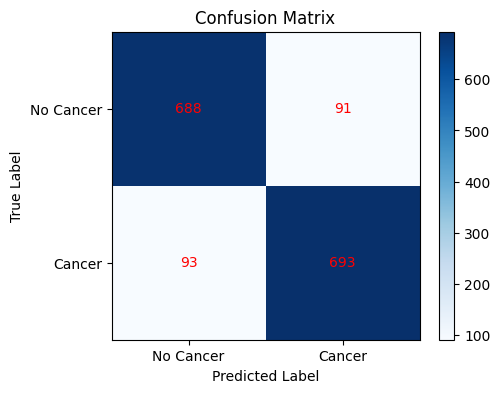

In [325]:
cm = confusion_matrix(y_test, y_pred)

# Define class labels manually (binary example)
class_names = ["No Cancer", "Cancer"]

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Tick marks with class names
plt.xticks(np.arange(len(class_names)), class_names)
plt.yticks(np.arange(len(class_names)), class_names)

# Annotate each cell with count
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="red")

plt.show()

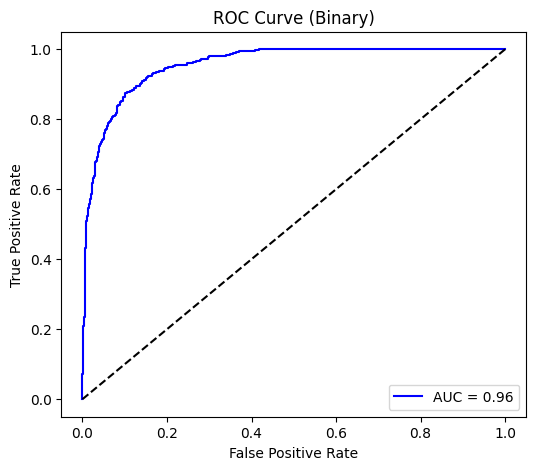

In [326]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Binary)")
plt.legend()
plt.show()